# Richard Johnson L20455045 
# COSC 5340 Big Data Computer Systems 
# Project 1
# 02 May 2022 
# Professor Jiangjiang Liu

# Credit Card Approval Machine Learning Model

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE

In [2]:
df = pd.read_csv('clean_dataset.csv', dtype={'ZipCode': str})

# Data Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(9), object(4)
memory usage: 86.4+ KB


In [4]:
df.head(10)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.250,1,1,1,0,ByBirth,00202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.040,1,1,6,0,ByBirth,00043,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.500,1,0,0,0,ByBirth,00280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.750,1,1,5,1,ByBirth,00100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.710,1,0,0,0,ByOtherMeans,00120,0,1
5,1,32.08,4.000,1,1,CommunicationServices,White,2.500,1,0,0,1,ByBirth,00360,0,1
6,1,33.17,1.040,1,1,Transport,Black,6.500,1,0,0,1,ByBirth,00164,31285,1
7,0,22.92,11.585,1,1,InformationTechnology,White,0.040,1,0,0,0,ByBirth,00080,1349,1
8,1,54.42,0.500,0,0,Financials,Black,3.960,1,0,0,0,ByBirth,00180,314,1
9,1,42.50,4.915,0,0,Industrials,White,3.165,1,0,0,1,ByBirth,00052,1442,1


In [5]:
print(df.columns)

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Industry',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')


<h4>Data Information</h4>
<ul>
    <li><b>Gender:</b> 1=Male, 0=Female</li>
    <li><b>Age:</b> in years</li>
    <li><b>Debt:</b> outstanding debt (scaled)</li>
    <li><b>Married:</b> 1=Married, 0=Single/Divorce/etc.</li>
    <li><b>BankCustomer:</b> 1=has a bank account, 0=doesn't have a bank account</li>
    <li><b>Industry:</b> current or most recent job sector</li>
    <li><b>Ethnicity:</b> ethnicity</li>
    <li><b>YearsEmployed:</b> years employed</li>
    <li><b>PriorDefault:</b> 1=has prior default, 0=no prior default</li>
    <li><b>Employed:</b> 1=employed, 0=unemployed</li>
    <li><b>CreditScore:</b> credit score (scaled)</li>
    <li><b>DriversLicense:</b> 1=has driver license, 0=no driver license</li>
    <li><b>Citizen:</b> citizenship, either ByBirth, ByOtherMeans or Temporary</li>
    <li><b>ZipCode:</b> zip code</li>
    <li><b>Income:</b> income (scaled)</li>
    <li><b>Approved:</b> 1=approved, 0=not approved</li>
</ul>

<p>Some numeric values like debt and income are scaled, which means that the data does not represent the amount that it shows.</p>

In [6]:
print(f'Number of null values: {df.isnull().values.sum()}')
print(f'Number of duplicated values: {df.duplicated().values.sum()}')

Number of null values: 0
Number of duplicated values: 0


# Data Visualization

In [7]:
# setting graphing format

plt.rcParams['figure.figsize'] = (10, 8)
font_fmt = {'fontweight': 'bold',
           'fontsize': 20}


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,690.0,0.695652,0.460464,0.00,0.000,1.00,1.0000,1.00
Age,690.0,31.514116,11.860245,13.75,22.670,28.46,37.7075,80.25
Debt,690.0,4.758725,4.978163,0.00,1.000,2.75,7.2075,28.00
Married,690.0,0.760870,0.426862,0.00,1.000,1.00,1.0000,1.00
BankCustomer,690.0,0.763768,0.425074,0.00,1.000,1.00,1.0000,1.00
YearsEmployed,690.0,2.223406,3.346513,0.00,0.165,1.00,2.6250,28.50
PriorDefault,690.0,0.523188,0.499824,0.00,0.000,1.00,1.0000,1.00
Employed,690.0,0.427536,0.495080,0.00,0.000,0.00,1.0000,1.00
CreditScore,690.0,2.400000,4.862940,0.00,0.000,0.00,3.0000,67.00
DriversLicense,690.0,0.457971,0.498592,0.00,0.000,0.00,1.0000,1.00


In [9]:
numeric_cols = ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']
boolean_cols = ['Gender', 'Married', 'BankCustomer', 'PriorDefault', 'Employed', 'DriversLicense', 'Approved']
string_cols = ['Industry', 'Ethnicity', 'Citizen']

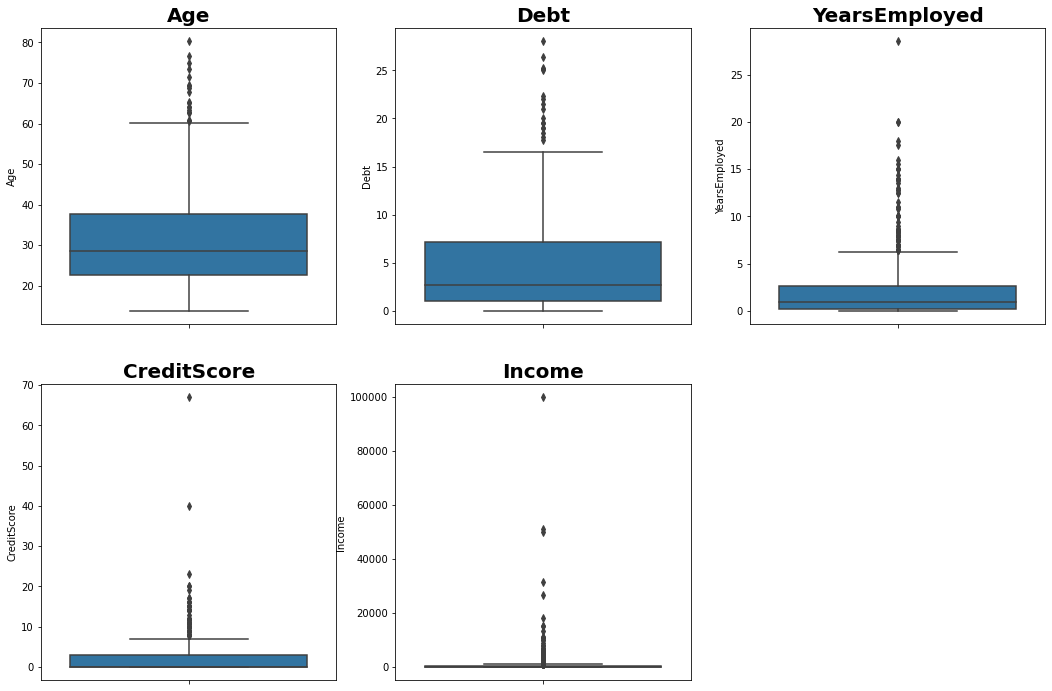

In [10]:
plt.figure(figsize=(18, 12))

for i, plot in enumerate(numeric_cols):
    plt.subplot(int(f'23{i+1}'))
    plt.title(f'{plot}', fontdict=font_fmt)
    plt.subplots_adjust(hspace=0.2)
    sns.boxplot(data=df, y=plot)

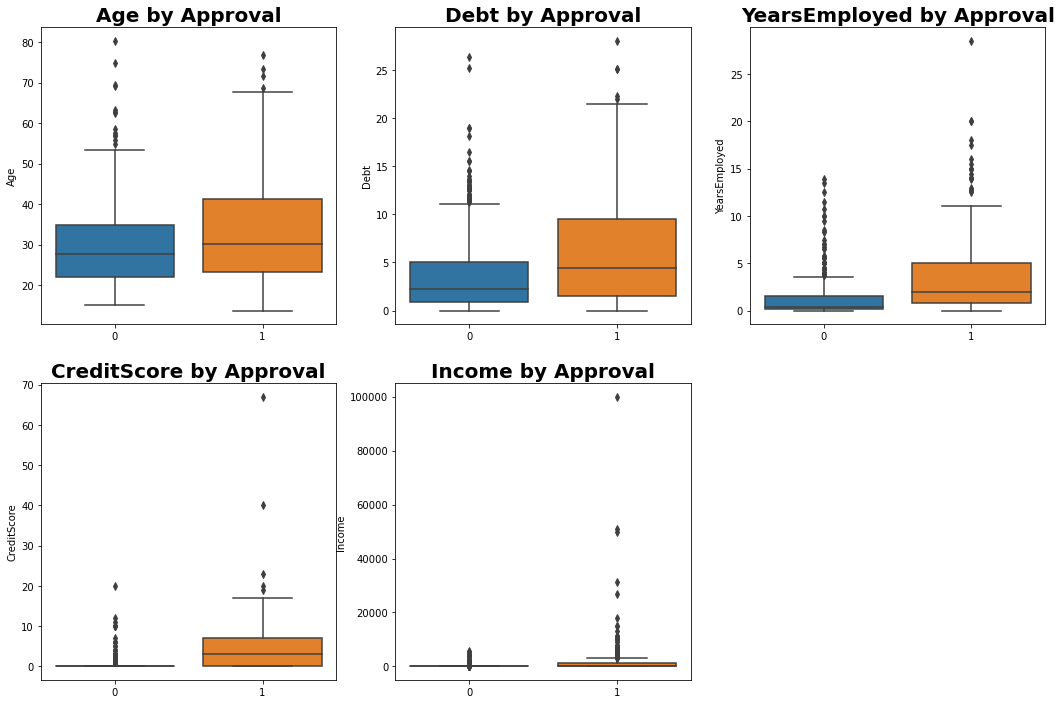

In [11]:
plt.figure(figsize=(18, 12))

for i, plot in enumerate(numeric_cols):
    plt.subplot(int(f'23{i+1}'))
    plt.title(f'{plot} by Approval', fontdict=font_fmt)
    plt.subplots_adjust(hspace=0.2)
    sns.boxplot(data=df, y=plot, x='Approved')
    plt.xlabel('')


plt.show()

In [12]:
for col in numeric_cols:
    for a in range(2):
        if a == 0:
            print(f'--- {col} (Not Approved) ---')
        else:
            print(f'--- {col} (Approved) ---')
        print(df[col][df['Approved']==a].describe())
        print('\n')

--- Age (Not Approved) ---
count    383.000000
mean      29.773029
std       10.777571
min       15.170000
25%       22.125000
50%       27.670000
75%       34.790000
max       80.250000
Name: Age, dtype: float64


--- Age (Approved) ---
count    307.000000
mean      33.686221
std       12.774745
min       13.750000
25%       23.210000
50%       30.170000
75%       41.330000
max       76.750000
Name: Age, dtype: float64


--- Debt (Not Approved) ---
count    383.000000
mean       3.839948
std        4.337662
min        0.000000
25%        0.835000
50%        2.210000
75%        5.000000
max       26.335000
Name: Debt, dtype: float64


--- Debt (Approved) ---
count    307.000000
mean       5.904951
std        5.471485
min        0.000000
25%        1.500000
50%        4.460000
75%        9.520000
max       28.000000
Name: Debt, dtype: float64


--- YearsEmployed (Not Approved) ---
count    383.000000
mean       1.257924
std        2.120481
min        0.000000
25%        0.125000
50%    

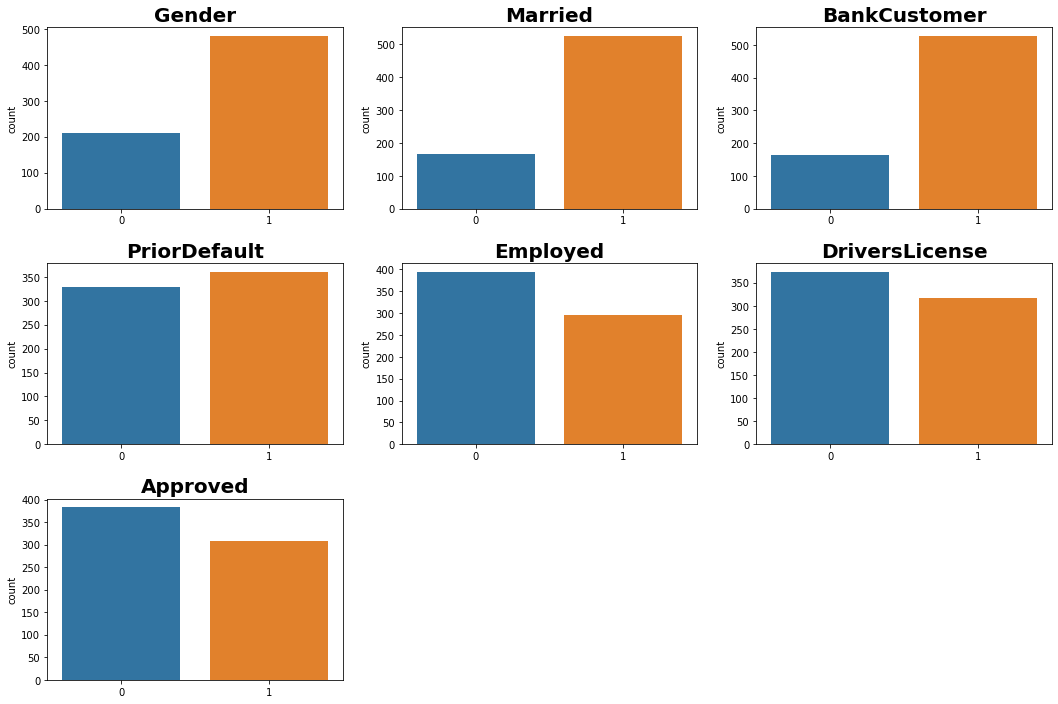

In [13]:
plt.figure(figsize=(18, 12))

for i, plot in enumerate(boolean_cols):
    plt.subplot(int(f'33{i+1}'))
    plt.title(plot, fontdict=font_fmt)
    plt.subplots_adjust(hspace=0.3)
    sns.countplot(x=df[plot])
    plt.xlabel('')

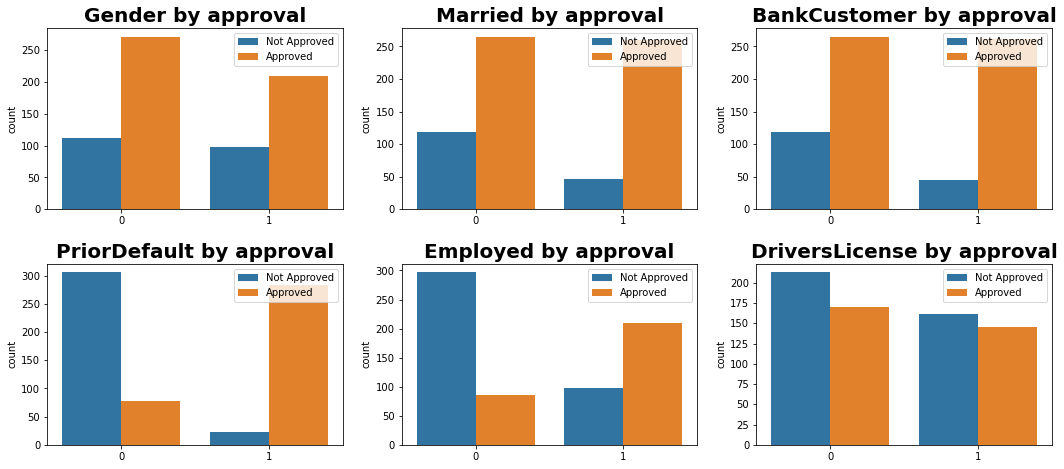

In [14]:
plt.figure(figsize=(18, 12))

for i, plot in enumerate(boolean_cols):
    if plot != 'Approved':
        plt.subplot(int(f'33{i+1}'))
        plt.title(f'{plot} by approval', fontdict=font_fmt)
        plt.subplots_adjust(hspace=0.3)
        sns.countplot(data=df, x='Approved', hue=plot)
        plt.xlabel('')
        plt.legend(['Not Approved', 'Approved'], loc='upper right')

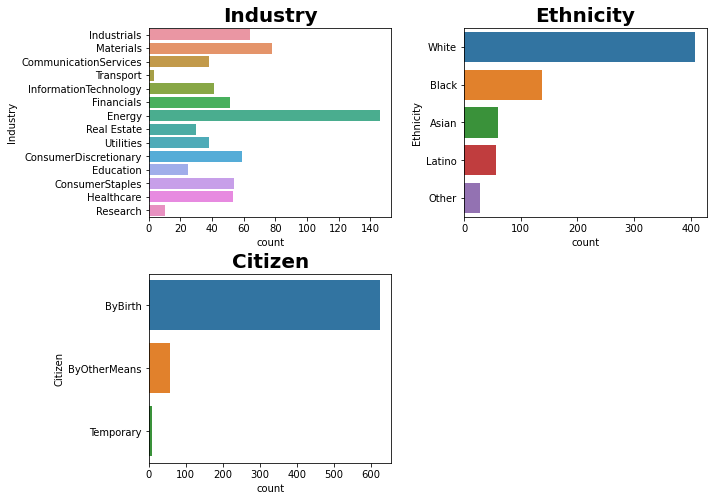

In [15]:
for i, plot in enumerate(string_cols):
    if plot != 'ZipCode':
        plt.subplot(int(f'22{i+1}'))
        plt.title(f'{plot}', fontdict=font_fmt)
        plt.subplots_adjust(wspace=0.3, hspace=0.3)
        sns.countplot(y=df[plot])

<Figure size 1152x720 with 0 Axes>

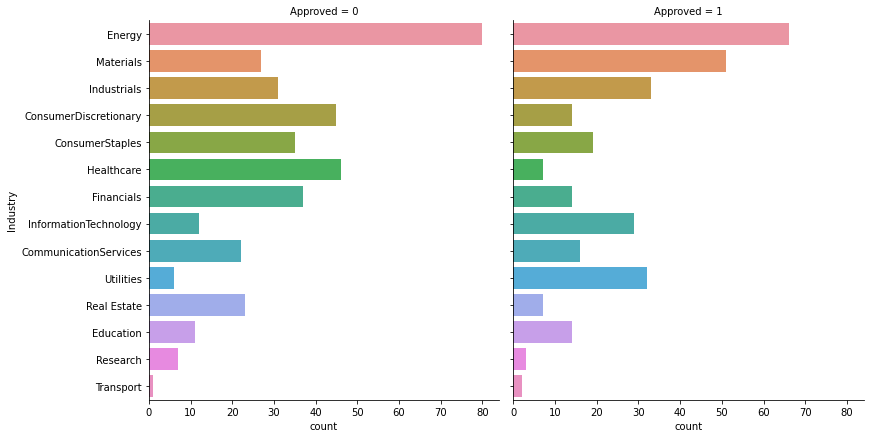

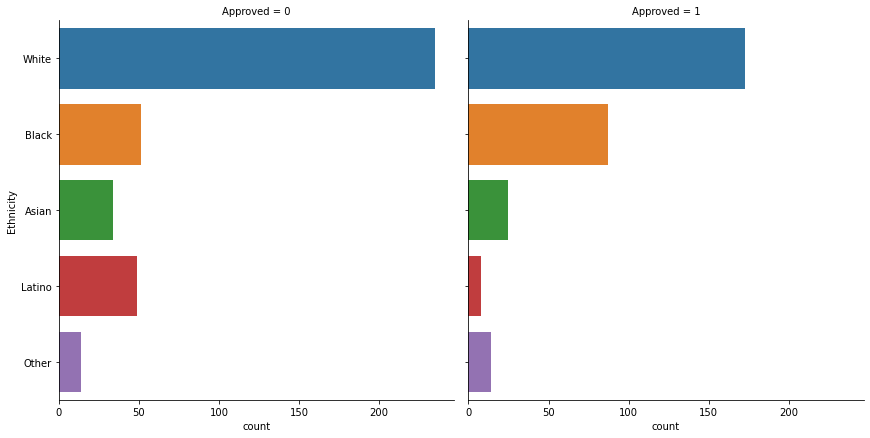

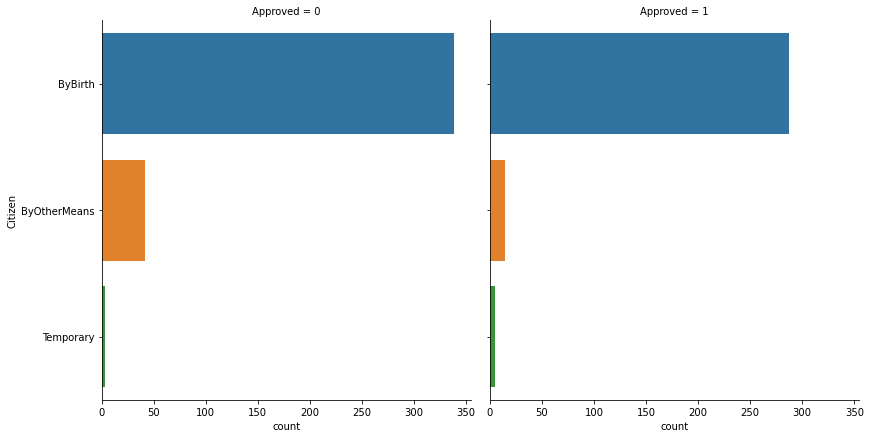

In [16]:
plt.figure(figsize=(16, 10))

for i, plot in enumerate(string_cols):
    sns.catplot(y=plot, col="Approved",
                data=df, kind="count",
                height=6, aspect=1,
                order=df[plot].value_counts().index)

<h3 style='color: #5AA49D'>Key Findings</h3>

<ul>
    <li>Based on descriptive analysis, <b>YearsEmployed</b>, <b>CreditScore</b>, and <b>Income</b> might affect creidt card approval chance; the higher the numbers, the higher the chance of approval.</li>
    <li><b>PriorDefault</b> and <b>Employed</b> also seem to be significant factors in determining approval status. Having prior default or defaults increases the chance of approval. Being employed also increases the chance of approval.</li>
</ul>

# Data Wrangling

In [17]:
# removing ZipCode, Industry, Ethnicity, and Citizenship from the training dataset
# I think including these information would be unethical to be used for credit card approving

df_copy = df.drop(string_cols, axis=1)
df_copy.drop('ZipCode', axis=1, inplace=True)
print(string_cols)
df_copy.head()

['Industry', 'Ethnicity', 'Citizen']


,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income,Approved
0,1,30.83,0.000,1,1,1.25,1,1,1,0,0,1
1,0,58.67,4.460,1,1,3.04,1,1,6,0,560,1
2,0,24.50,0.500,1,1,1.50,1,0,0,0,824,1
3,1,27.83,1.540,1,1,3.75,1,1,5,1,3,1
4,1,20.17,5.625,1,1,1.71,1,0,0,0,0,1


In [18]:
# splitting X (variables) and y (output)
X = df_copy.drop('Approved', axis=1)
y = df_copy['Approved']

In [19]:
# rescaling data
sc = MinMaxScaler(feature_range=(0,1))

X = sc.fit_transform(X)

# Machine Learning model

Evaluate different classification models to see which produce the best accuracy score for this dataset.

In [20]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    scoring = f"{name}: {round(cv_results.mean(), 4)} ({round(cv_results.std(),4)})"
    print(scoring)


LR: 0.8449 (0.1936)
KNN: 0.8029 (0.1699)
DT: 0.7797 (0.1436)
NB: 0.7725 (0.1363)
SVM: 0.8391 (0.1928)


<p><b>Logistic Regression</b> and <b>KNN</b> seem to have the best accuracy score out of those classification models (84.49% and 80.29%, respectively).</p>

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

test_model = LogisticRegression()
test_model.fit(X_train, y_train)

predictions = test_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy score for Logistic Regression model: {accuracy}')

Accuracy score for Logistic Regression model: 0.8985507246376812


<p>An accuracy score of 89.86% is very good.</p>
<p>Let's try to improve the accuracy of the model and make sure that the model is not overly optimistic using:</p>
<ul>
    <li><a href='https://machinelearningmastery.com/rfe-feature-selection-in-python/'>Recursive Feature Elimination</a> (RFE) is a feature selection algorithm that will evaluate and rank the importance of each feature in the dataset. Then, it will eliminate features that aren't strongly correlate to the output.</li>
    <li><a href='https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/'>Repeated K-Fold cross validation</a> will help to reduce noises compared to the simple KFold cross validation method.</li>
</ul>

In [22]:
# we don't know how many features to choose so 5 features can be a good start for our RFE

rfe = RFE(LogisticRegression(), n_features_to_select=5)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [23]:
df_rank = pd.DataFrame(data=rfe.ranking_, index=df_copy.columns[:-1])
df_rank.rename(columns={0:'rank'}, inplace=True)
df_rank.sort_values('rank', ascending=True)

,rank
BankCustomer,1
YearsEmployed,1
PriorDefault,1
Employed,1
CreditScore,1
Income,2
DriversLicense,3
Married,4
Age,5
Gender,6


<p>When selecting 5 features, <b>BankCustomer</b>, <b>YearsEmployed</b>, <b>PriorDefault</b>, <b>Employed</b>, and <b>CreditScore</b> seem to be the top 5 important factors in our prediction model.</p>
<p>Now, we can try to create a pipeline </p>

In [24]:
results = []

for i in range(1, df_rank.shape[0]+1):
    pipeline = Pipeline(steps=[('rfe', RFE(LogisticRegression(), n_features_to_select=i)), ('lg', LogisticRegression())])
    cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=10)

    scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
    
    results.append([i, scores.mean(), scores.std()])

In [25]:
df_pipeline = pd.DataFrame(data=results, columns=['n_feature', 'mean', 'std'])
df_pipeline

,n_feature,mean,std
0,1,0.855072,0.027113
1,2,0.855072,0.027113
2,3,0.855072,0.027113
3,4,0.855072,0.027152
4,5,0.854783,0.026485
5,6,0.856377,0.026711
6,7,0.854203,0.027138
7,8,0.853043,0.026169
8,9,0.853333,0.026429
9,10,0.853478,0.026018


In [26]:
print(f"Cross val score mean: {df_pipeline['mean'].mean()}")
print(f"Cross val score std: {df_pipeline['mean'].std()}")

Cross val score mean: 0.8544532279314887
Cross val score std: 0.0010270259134047236


In [27]:
df_pipeline[df_pipeline['mean'] == df_pipeline['mean'].max()]

,n_feature,mean,std
5,6,0.856377,0.026711


<p>Picking 6 features from the 11 features from the dataset has the best accuracy.</p>
<p>Let's look at the ranking of each feature:</p>

In [28]:
rfe = RFE(LogisticRegression(), n_features_to_select=6)
rfe.fit(X_train, y_train)
df_rank = pd.DataFrame(data=rfe.ranking_, index=df_copy.columns[:-1])
df_rank.rename(columns={0:'rank'}, inplace=True)
df_rank.sort_values('rank', ascending=True)

,rank
BankCustomer,1
YearsEmployed,1
PriorDefault,1
Employed,1
CreditScore,1
Income,1
DriversLicense,2
Married,3
Age,4
Gender,5


<p>In addition to our first 5 features, <b>Income</b> is another feature that seems to have high importance in determining the credit card approval.</p>
<p>Let's visualize these features:</p>

In [29]:
cols = ['BankCustomer', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'Income', 'Approved']

new_df = df[cols]
new_df.head()

,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved
0,1,1.25,1,1,1,0,1
1,1,3.04,1,1,6,560,1
2,1,1.50,1,0,0,824,1
3,1,3.75,1,1,5,3,1
4,1,1.71,1,0,0,0,1


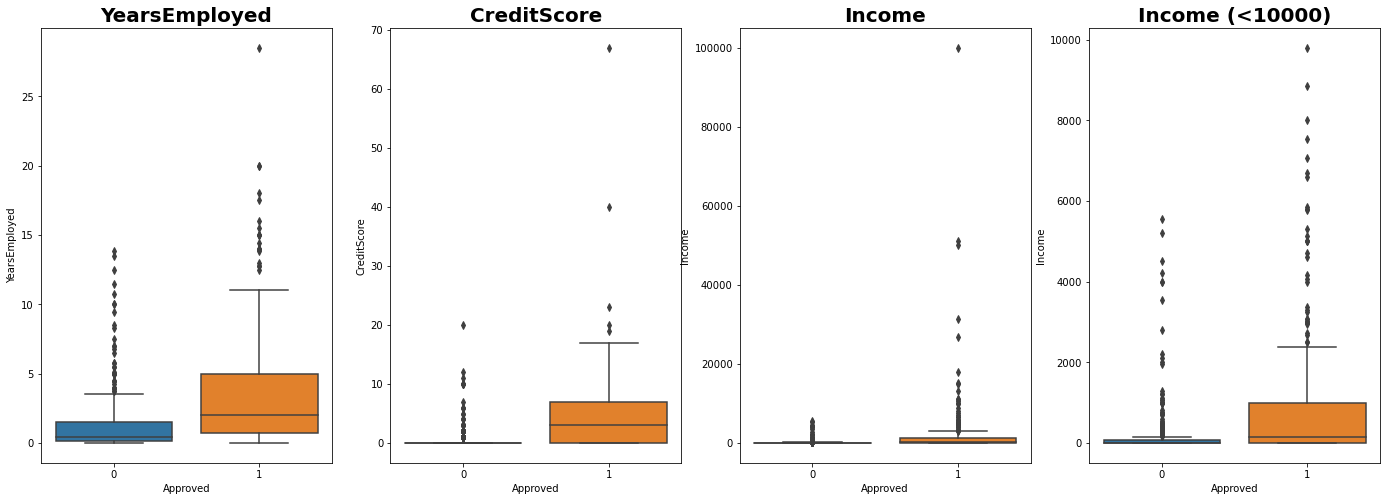

In [30]:
plt.figure(figsize=(24, 8))

plt.subplot(141)
sns.boxplot(data=new_df, y='YearsEmployed', x='Approved')
plt.title('YearsEmployed', fontdict=font_fmt)
plt.subplot(142)
sns.boxplot(data=new_df, y='CreditScore', x='Approved')
plt.title('CreditScore', fontdict=font_fmt)
plt.subplot(143)
sns.boxplot(data=new_df, y='Income', x='Approved')
plt.title('Income', fontdict=font_fmt)
plt.subplot(144)
sns.boxplot(data=new_df[new_df['Income']<10000], y='Income', x='Approved')
plt.title('Income (<10000)', fontdict=font_fmt)

plt.show()

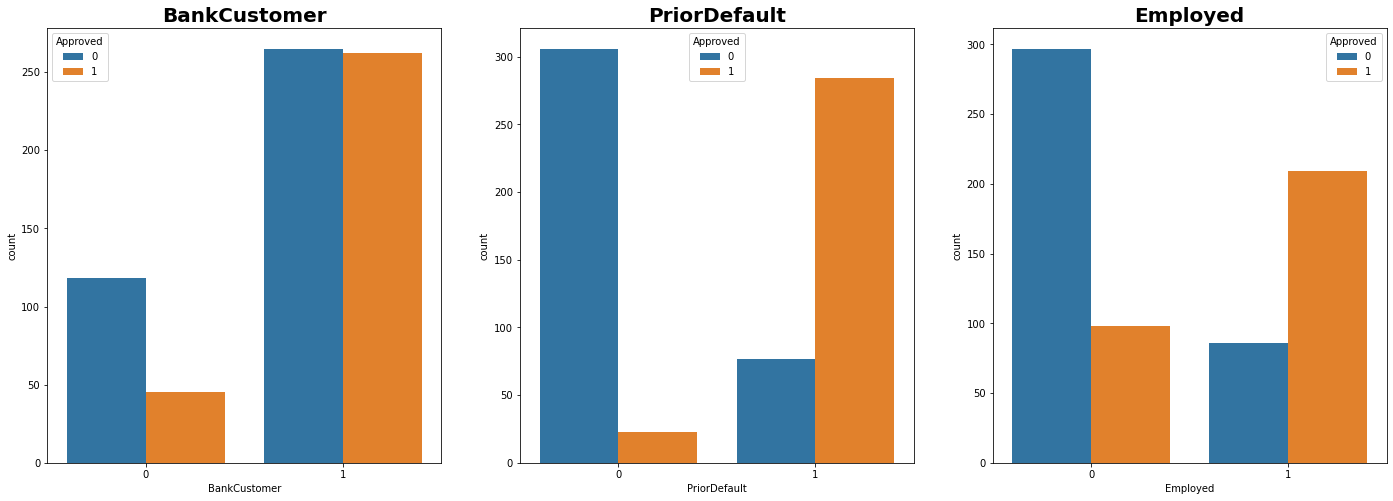

In [31]:
plt.figure(figsize=(24, 8))

plt.subplot(131)
sns.countplot(data=new_df, x='BankCustomer', hue='Approved')
plt.title('BankCustomer', fontdict=font_fmt)
plt.subplot(132)
sns.countplot(data=new_df, x='PriorDefault', hue='Approved')
plt.title('PriorDefault', fontdict=font_fmt)
plt.subplot(133)
sns.countplot(data=new_df, x='Employed', hue='Approved')
plt.title('Employed', fontdict=font_fmt)

plt.show()

# Conclusion

<p>We will be using <b>Logistic Regression</b> with <b>6</b> of the most important features for our predictive model:</p>
<ul>
    <li>BankCustomer</li>
    <li>YearsEmployed</li>
    <li>PriorDefault</li>
    <li>Employed</li>
    <li>CreditScore</li>
    <li>Income</li>
</ul>
<p>Our classification model has an accuracy of <b>85.6% (standard deviation = 0.027)</b>. This model is fairly accurate in predicting whether to approve an applicant for a credit card or not.</p>
<p>I think we can also remove Gender, Age, and Marriage status from our set of features since they can somewhat be unethical for the ML model. However, with RFE, the algorithm automatically elimiates unimportant features.</p>